In [2]:
from src.evaluate_tools import plot_confusion_matrix_by_cm
import numpy as np
%matplotlib inline

Using TensorFlow backend.


# vali 100:100:100 version


 CONFUSION MATRIX
[[1.   0.   0.  ]
 [0.06 0.93 0.01]
 [0.   0.   1.  ]]


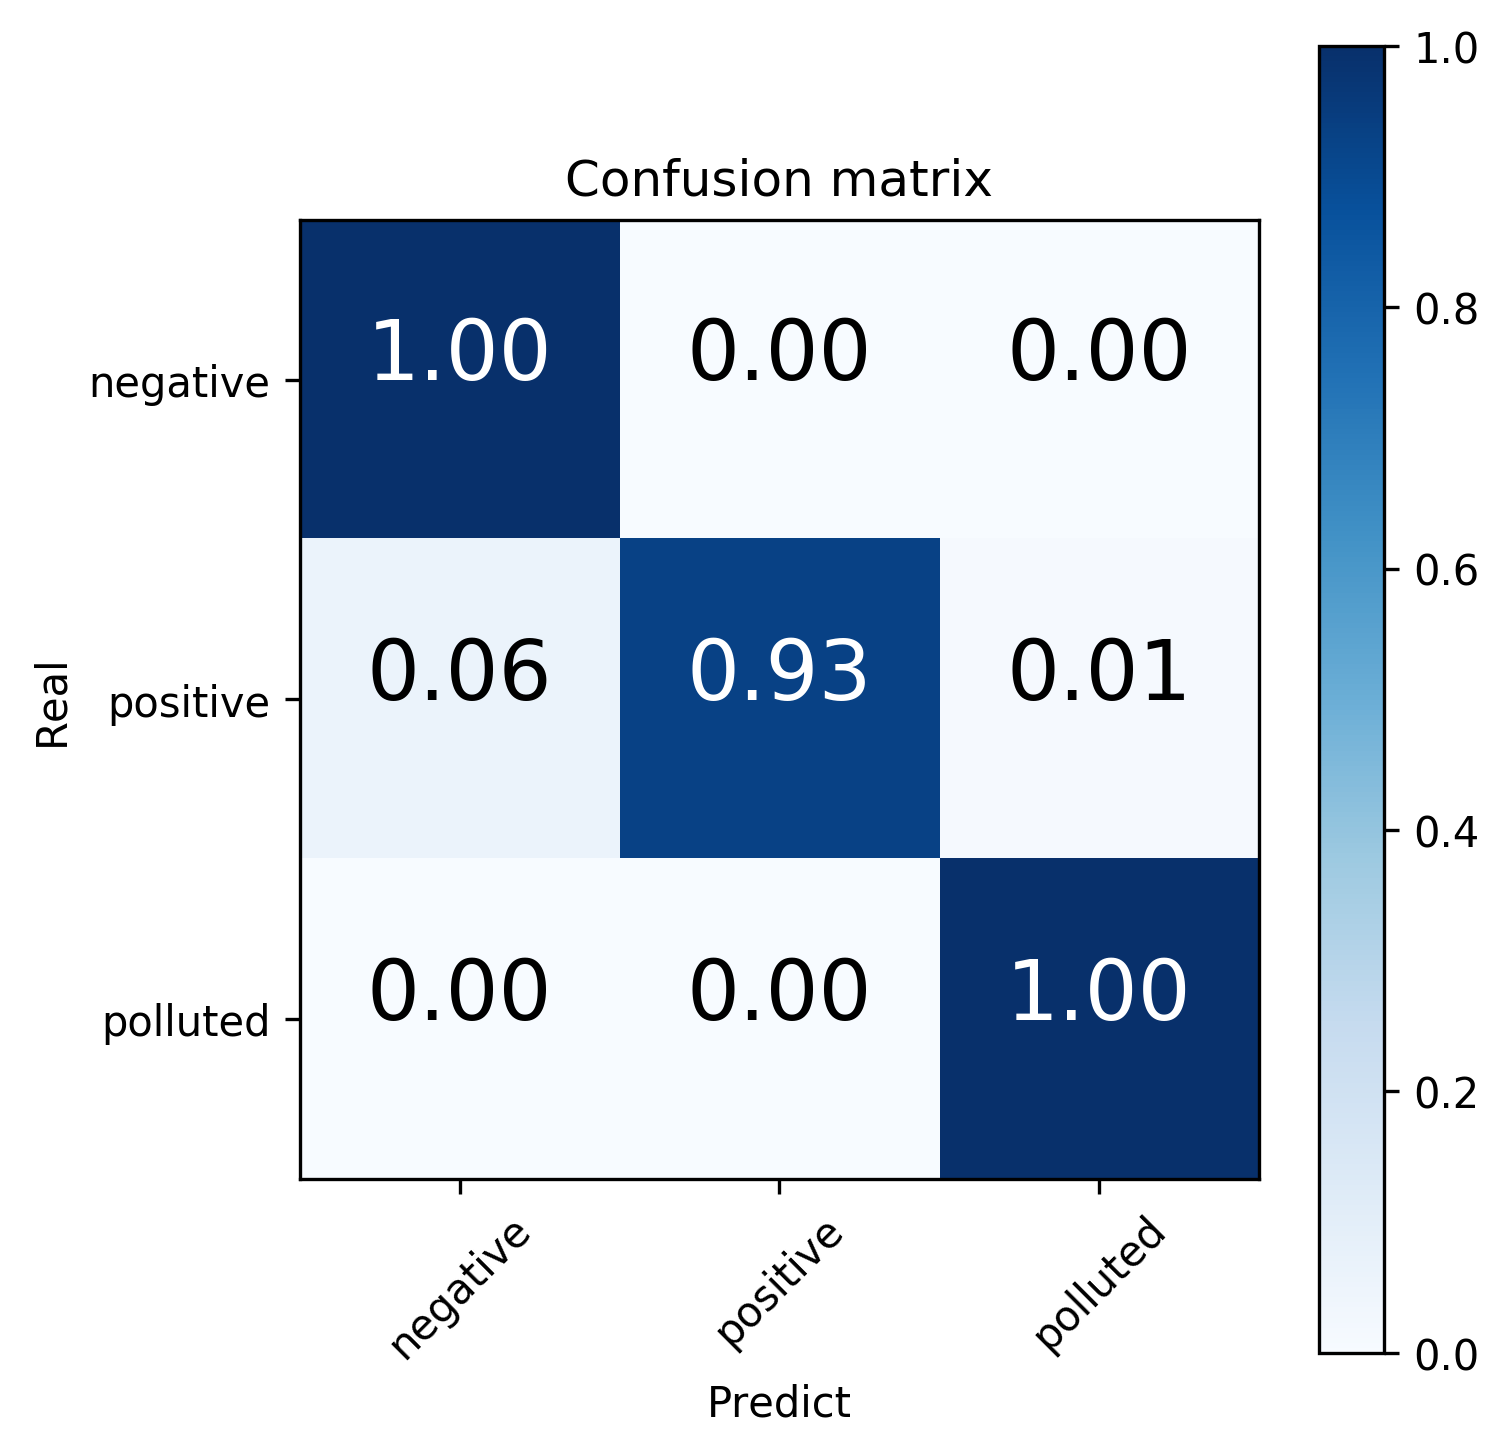


 CONFUSION MATRIX
[[1.   0.  ]
 [0.03 0.97]]


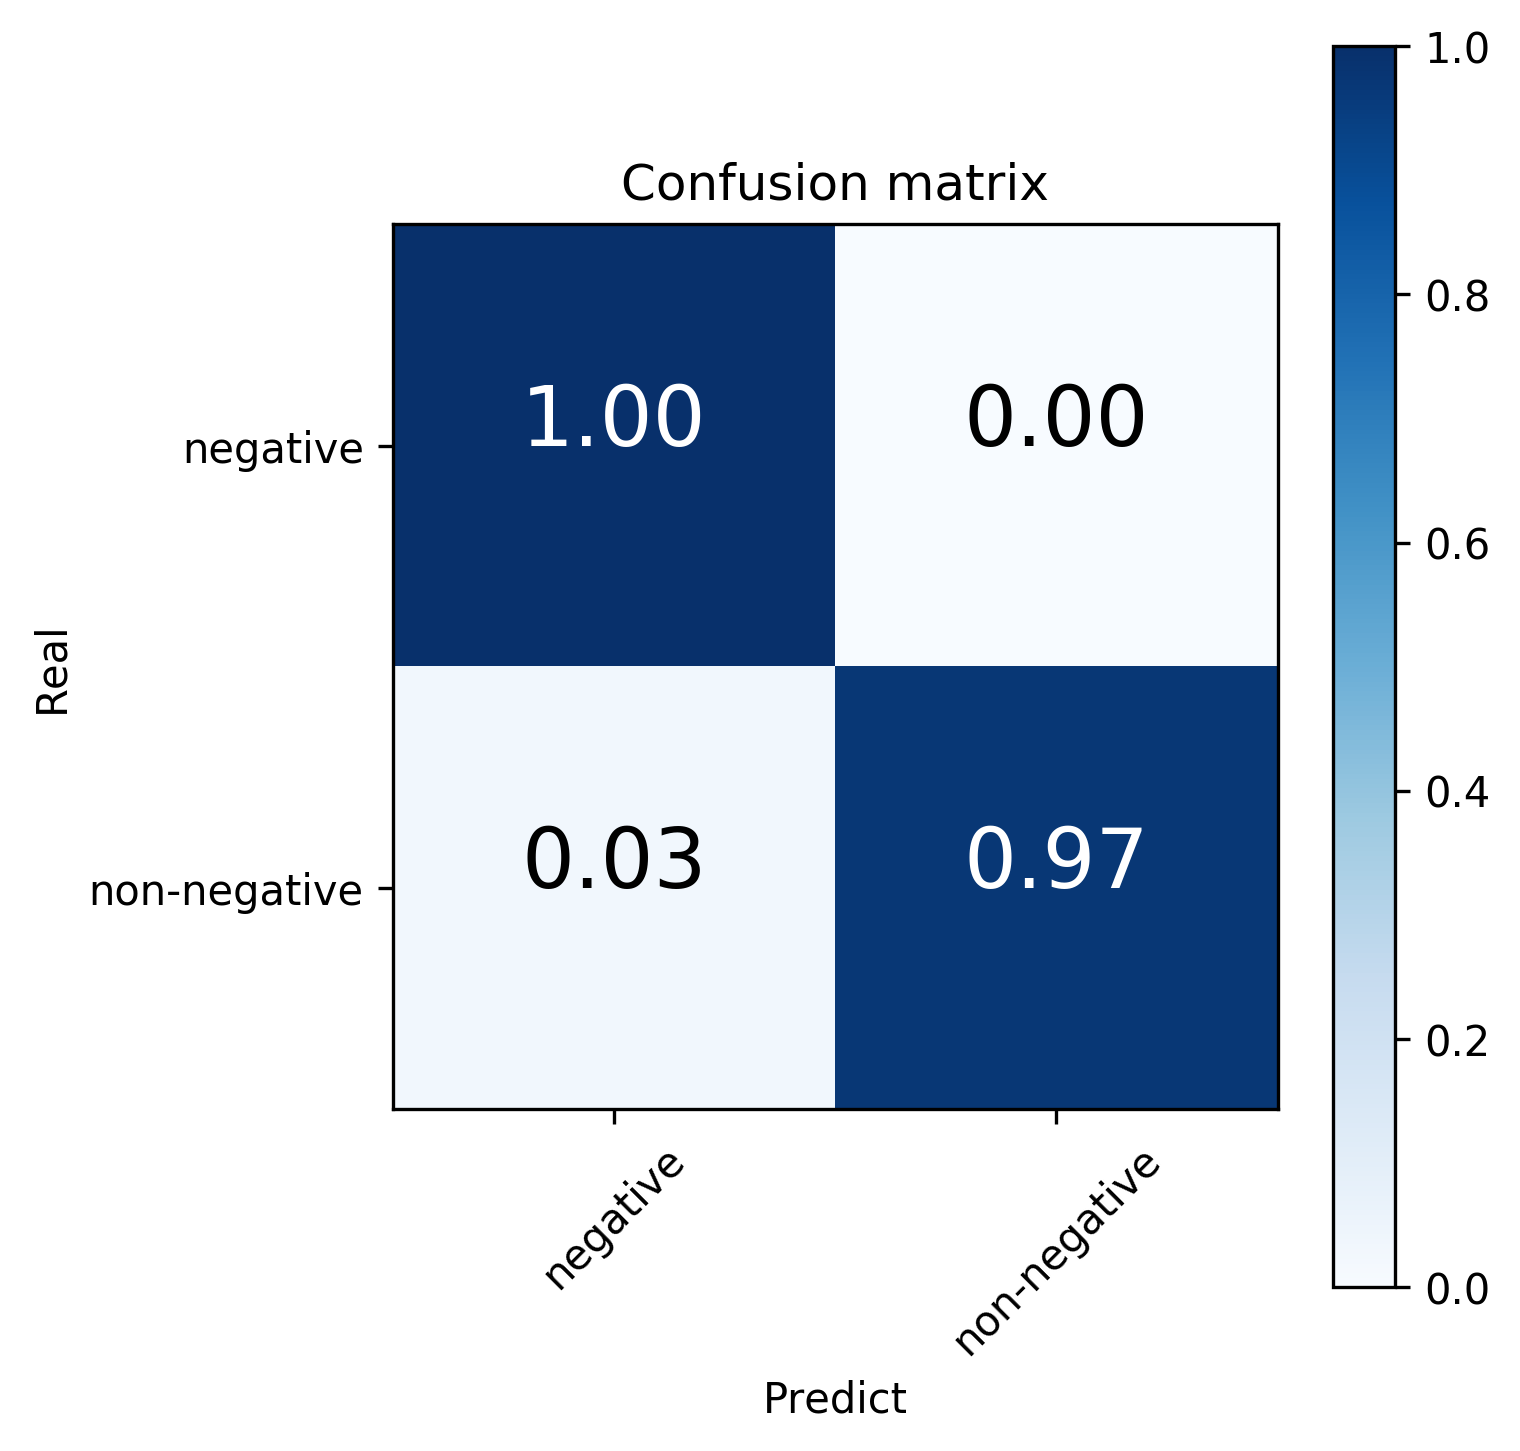

nn recall: 0.97
nn precision: 1.0
nn f1 score: 0.9847715736040609


In [13]:
cm=np.array([
    [1, 0, 0],
    [0.06, 0.93, 0.01],
    [0.0, 0.0, 1]
])
cm2=np.array(
[
    [cm[0][0],sum(cm[0][1:])],
    [cm[1][0]+cm[2][0],cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]]
]
)
dataset='tstransfer_yad2k_keras_2020-04-14-21:16_best.test'
plot_confusion_matrix_by_cm(cm,["negative","positive","polluted"],filename=dataset,save=False)
plot_confusion_matrix_by_cm(cm2,["negative","non-negative"],filename=dataset+'_2class',save=False)
r=(cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2])/2
p=(cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2])/((cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2])+sum(cm[0][1:]))
print("nn recall: "+str(r))
print("nn precision: "+str(p))
print("nn f1 score: "+str((2*p*r)/(p+r)))

# test 6567:377:249 version


 CONFUSION MATRIX
[[0.98713295 0.00923788 0.00362917]
 [0.29806259 0.61400895 0.08792846]
 [0.10588235 0.06176471 0.83235294]]


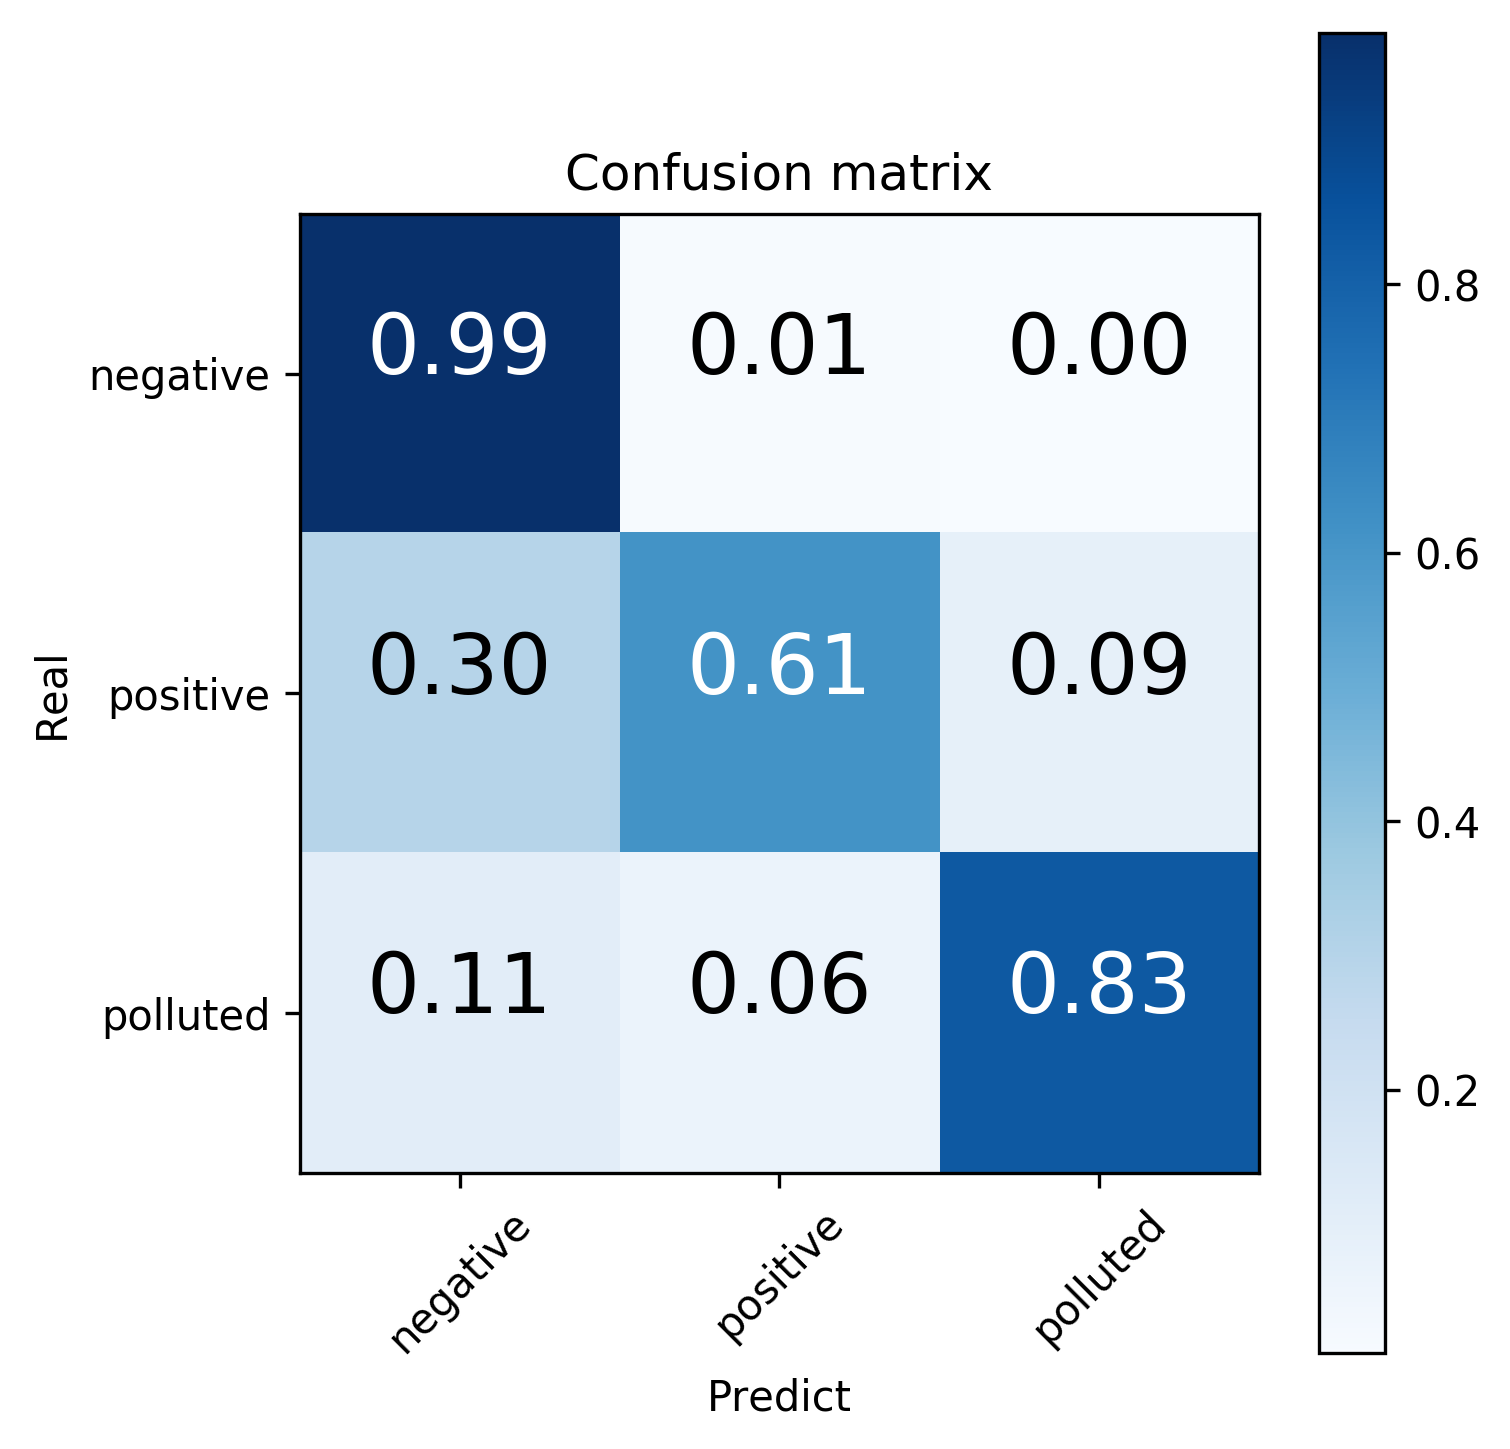


 CONFUSION MATRIX
[[0.98713296 0.01286704]
 [0.23260437 0.76739563]]


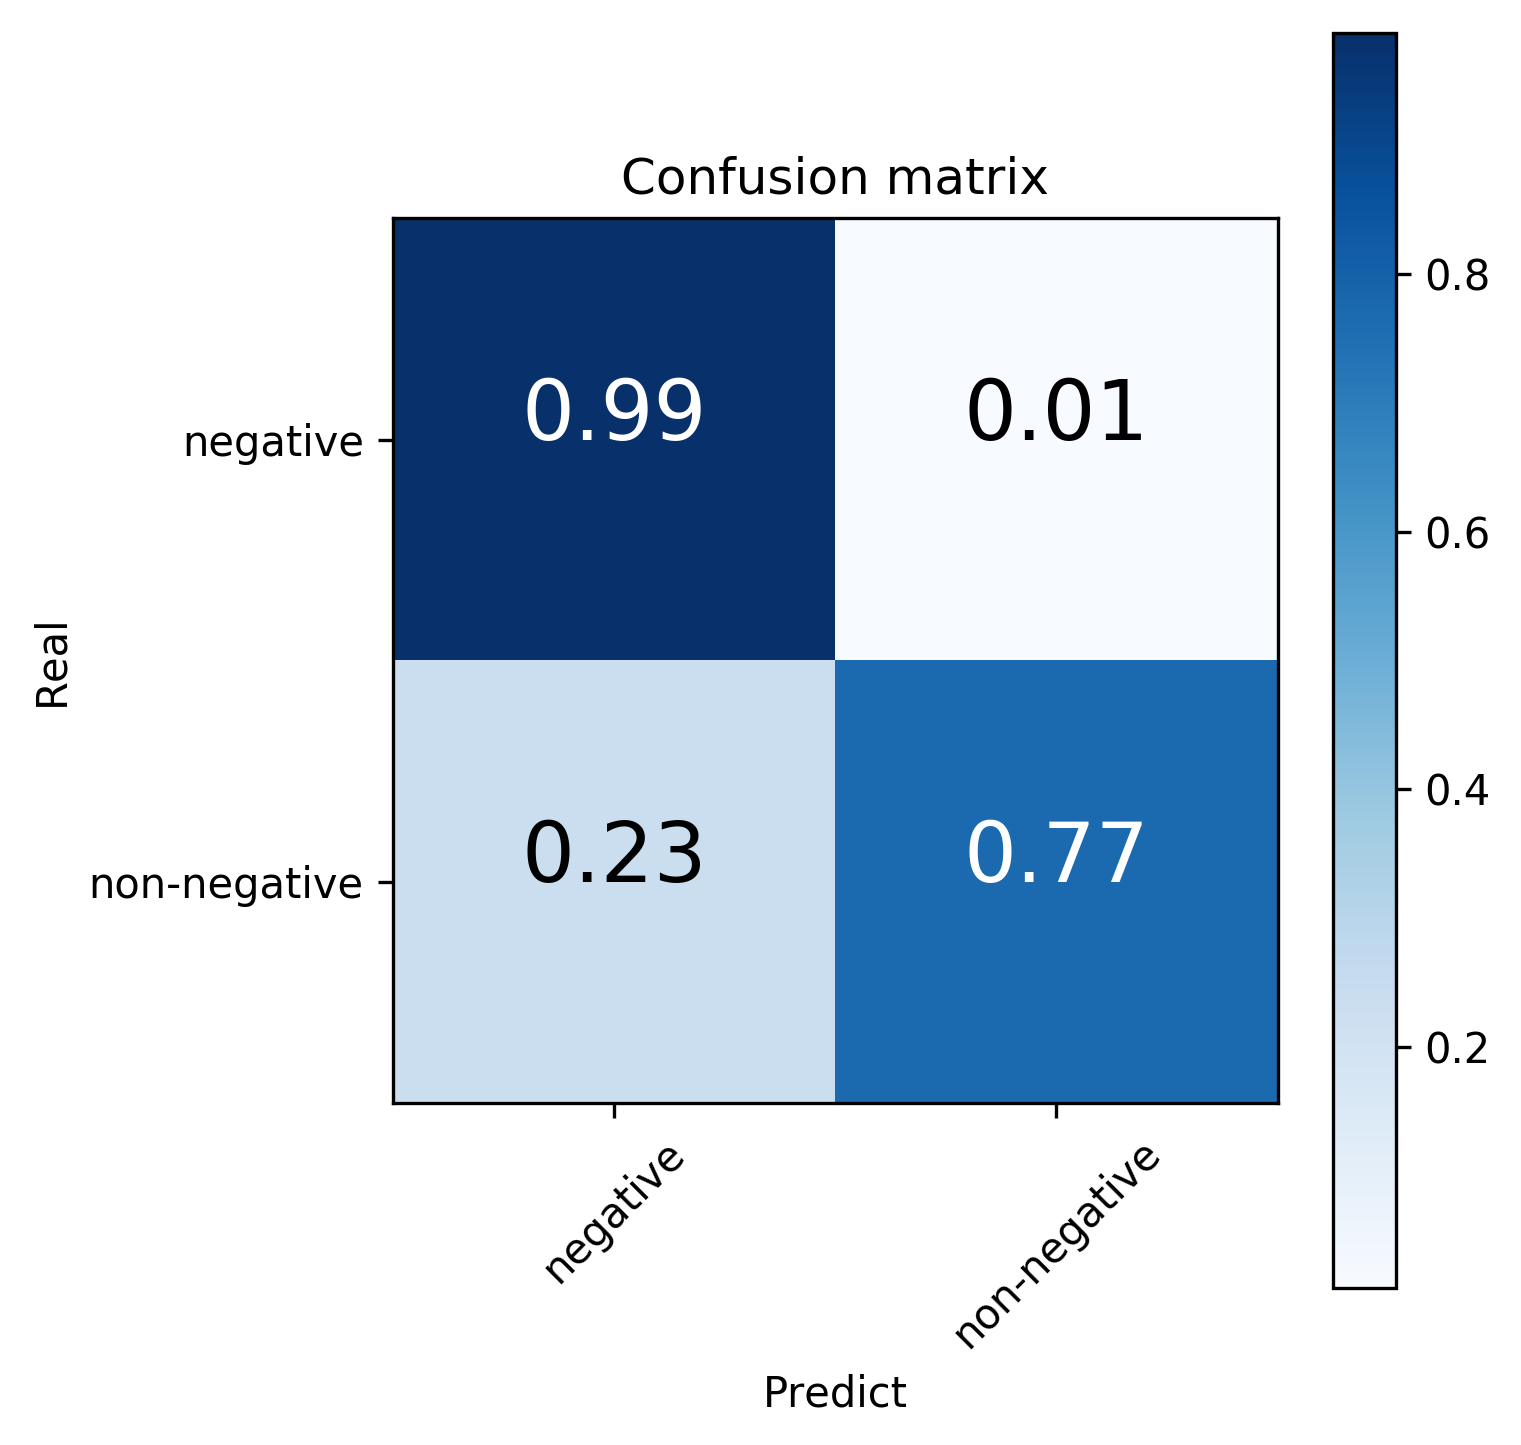

nn recall: 0.7636003956478734
nn precision: 0.908235294117647
nn f1 score: 0.8296614723267061


In [12]:
fname='TY_TS-YAD2K_fixed'
cm=np.array([
 [0.98713296, 0.00923788, 0.00362917],
 [0.29806259, 0.61400894, 0.08792846],
 [0.10588235, 0.06176471, 0.83235294]])

restore=np.array([
    cm[0]*6062,
    cm[1]*671,
    cm[2]*340
],dtype='int64')

cm2=np.array([
    [restore[0][0],sum(restore[0][1:])],
    [restore[1][0]+restore[2][0],restore[1][1]+restore[1][2]+restore[2][1]+restore[2][2]]
])
plot_confusion_matrix_by_cm(cm,["negative","positive","polluted"],filename=fname,save=True)
plot_confusion_matrix_by_cm(cm2,["negative","non-negative"],filename=fname+'_2class',save=True)
r=(restore[1][1]+restore[1][2]+restore[2][1]+restore[2][2])/(671+340)
p=(restore[1][1]+restore[1][2]+restore[2][1]+restore[2][2])/((restore[1][1]+restore[1][2]+restore[2][1]+restore[2][2])+sum(restore[0][1:]))
print("nn recall: "+str(r))
print("nn precision: "+str(p))
print("nn f1 score: "+str((2*p*r)/(p+r)))